In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

2024-01-17 02:26:48.208453: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
model = tf.keras.models.load_model('./models/object_detection.h5')

In [4]:
path = './test_images/Cars06.jpeg'
image = load_img(path) 
image = np.array(image,dtype=np.uint8) 
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0

In [5]:
h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)

Height of the image = 330
Width of the image = 600


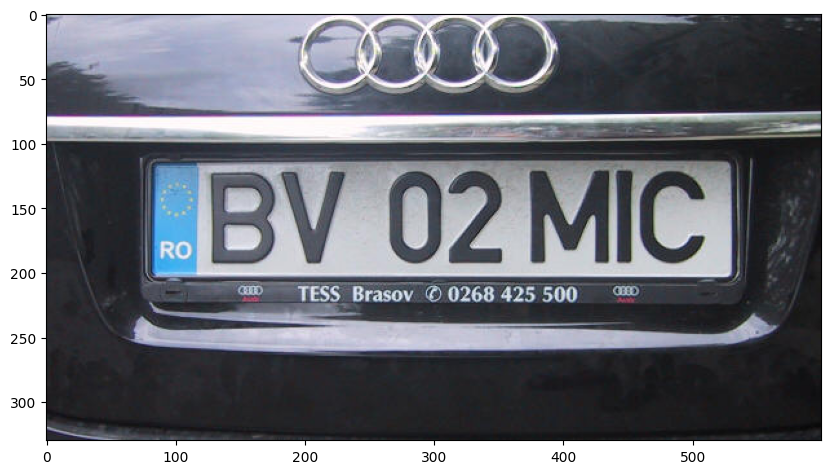

In [6]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [7]:
image_arr_224.shape

(224, 224, 3)

In [8]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [9]:
coords = model.predict(test_arr)
coords

1/1 [==============================] - 2s 2s/step


array([[0.16388349, 0.8661991 , 0.29651743, 0.64956826]], dtype=float32)

In [10]:
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[ 98.33009541, 519.71944571,  97.85075247, 214.35752571]])

In [11]:
coords = coords.astype(np.int32)
coords

array([[ 98, 519,  97, 214]], dtype=int32)

(98, 97) (519, 214)


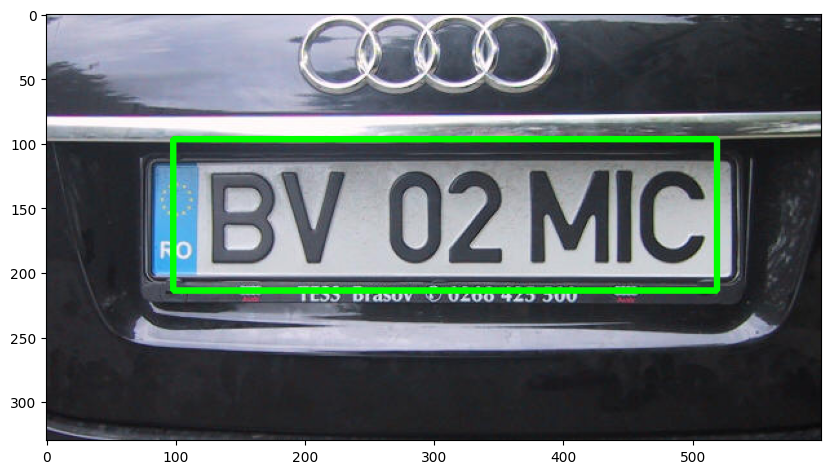

In [12]:

xmin, xmax,ymin,ymax = coords[0]
pt1 =(xmin,ymin)
pt2 =(xmax,ymax)
print(pt1, pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [13]:

path = './test_images/N207.jpeg'
def object_detection(path):

    image = load_img(path) 
    image = np.array(image,dtype=np.uint8)
    image1 = load_img(path,target_size=(224,224))
    image_arr_224 = img_to_array(image1)/255.0
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    coords = model.predict(test_arr)
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

1/1 [==============================] - 0s 118ms/step
(98, 97) (519, 214)


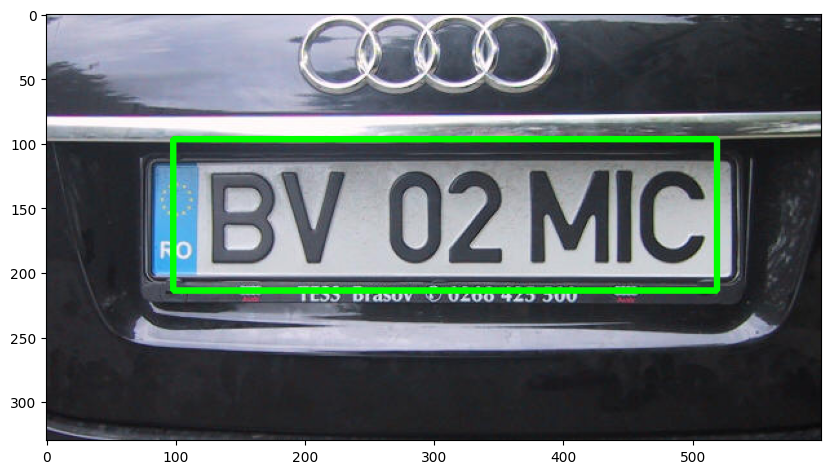

In [14]:
path = './test_images/Cars06.jpeg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

# Optical Character Recognition - OCR

In [15]:
import pytesseract as pt

1/1 [==============================] - 0s 100ms/step
(98, 97) (519, 214)


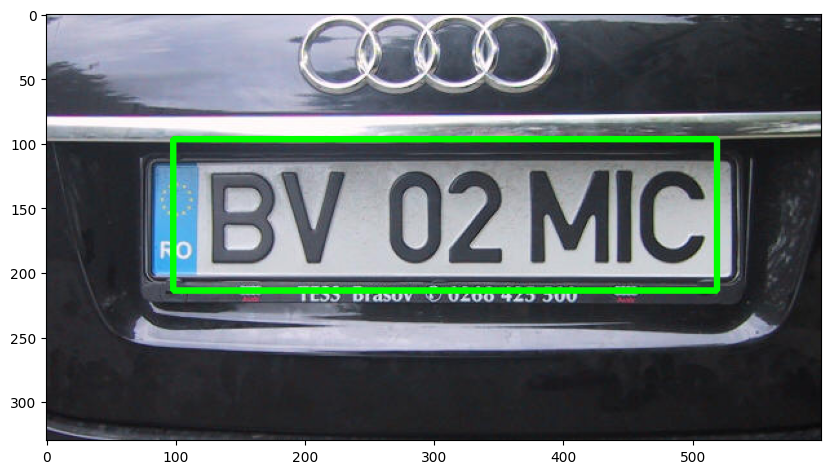

In [16]:
path = './test_images/Cars06.jpeg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [17]:
img = np.array(load_img(path))
xmin ,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]

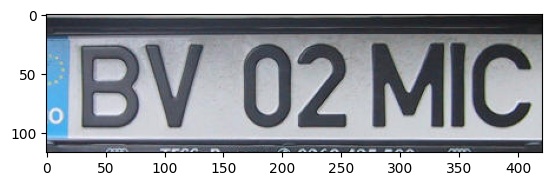

In [18]:
plt.imshow(roi)
plt.show()

In [19]:
text = pt.image_to_string(roi)
print(text)

‘BV 02MIC

